# Numerical Linear Algebra In Machine Learning
----------------

## Contents

1. Introduction 

2. Introduction To Function Approximation

3. Introduction To Regression

4. Linear Solvers For Least Squares Regression 
   - Cholesky Factorization For Normal Equations
    
   - Singular Values Decomposition
    
   - Controlling For Overfitting With Regularization
   
   - Implementation in Scikit-learn


5. A Touch Of Recommendation Systems
  
6. Where To Go From Here


## Introduction
------------------

In this blogpost we'll go over applications of numerical linear algebra in machine learning starting out with regression and getting to modern recommender systems! Numerical linear algebra (and numerical analysis more generally) was one of thoses courses that I learned, thought was boring and never wanted to study again. Only with maturity that comes with age (and a PhD) was I able to understand and appreciate the true power of numerical linear alebra.  Infact *understanding (distribued) linear algebra is probably one of the most important and useful tools I have ever learned.*  It has allowed me to contribute to open source libraries for scientific computing and understand how big data and machine learning systems work.  The reason why numerical linear algebra is so important is because it allows us to approximate functions.  In scientific computing and machine learning one is interested in **how to approximate a function** $f(x)$.  Numerical analysis and statistics concerns itself with **how good is our approximation to** $f(x)$? 


Traditionally algorithms in Numerical Linear Algebra are taught/learned in [Matlab](https://www.mathworks.com/products/matlab.html) for easy learning, but written for production Fortran, C/C++ and more recently Julia for high performance. The fields of Data Science, Machine Learning and Artifical Intelligence have a seen recent boom and given a new life and applications to these algorithms. These fields leans more to using Python (though R is often used as well) as the primaty programming language, but make heavy use of wrappers to [BLAS](http://www.netlib.org/blas/) and [LAPACK](http://www.netlib.org/lapack/) libraries written in Fortran and C/C++.  

Many Data Scientist and Machine Learning Researchers also heavily make use of [Jupyter](https://jupyter.org/) notebook as a tool for rapid prototyoing and writing experiments in Python (though it also allows for the use of other languages likes R, Julia and Scala). Jupyter notebook is as an interactive envrionment for computing that runs in your web browser and is very similar to [Mathematica's](https://www.wolfram.com/notebooks/) notebook. The fact it runs in a web browser is quite convenient as it will allows users to easily work on a remote computer without any complicated set up.


##  Introduction To Function Approximation
------------------------

Let's now move onto function approximation.  One learns in Calculus to represent smooth functions $f : \, \mathbb{R} -> \mathbb{R}$ about some point $x_0$ using special polynomials called [power series](http://tutorial.math.lamar.edu/Classes/CalcII/PowerSeries.aspx) or [Taylor series](http://mathworld.wolfram.com/TaylorSeries.html):


\begin{equation}
f(x) \, = \sum_{n=0}^{\infty} \, a_n (x - x_0)^{n}
\end{equation}

We can find the coefficients to the series by the equation,


\begin{equation} 
a_{n} \; = \; \frac{(-1)^{n} }{n!} \, f^{n}(x_0)
\end{equation}

And that there is a radius of convergence $R \, \in \mathbb{R}$ such that within $(x_0 - R, x_0 + R)$ (one should test the end points too) the series converges to $f(x)$ [uniformly](http://web.math.ucsb.edu/~padraic/caltech/math1d_2010/ma1d_wk5_notes_2010.pdf) and outside that it does not necessarily converge to $f(x)$.  

We then learned that we can approximate our function $f(x)$ with the finite degree polynomial,

\begin{equation}
f(x) \, \simeq \, f_N(x) \, = \, a_0  \, + \, a_1 (x - x_0) \, + \,a_2 (x - x_0)^2 \, + \ldots \, + \, a_N (x - x_0)^N
\end{equation}

We can then use that approximation to perform calculations on our function that might not have been possible otherwise.  The most memorialble for me being learning how to [integrate a Gaussian](http://www.faculty.umassd.edu/michele.mandrioli/424book/fchm4.5.html), though [numerical integration](https://en.wikipedia.org/wiki/Numerical_integration) is usually perfered for finite integrals.


Power series were originaly developed to <a href="https://en.wikipedia.org/wiki/Power_series_solution_of_differential_equations">approximate solutions to differential equations</a>. As science and engineering progressed the differential equations become more complicated and harder to solve.  Other approximations methods were invented like <a href="https://en.wikipedia.org/wiki/Fourier_series">Fourier Series</a>:

\begin{equation}
f(x) \, \simeq \, f_N(x) \, = \, \frac{a_0}{2} \, + \sum_{k=1}^{N} \left(a_n \cos \left(\frac{2 \pi k x}{L} \right) + b_n \sin \left(\frac{2 \pi k x}{L} \right) \right)
\end{equation}


We remark that the functions $\cos\left(\frac{2 \pi k x}{L}\right)$ and $\sin\left(\frac{2 \pi k x}{L}\right)$ form an **orthogonal basis for the Hilbert Space** [$L^{2}([-L,L])$](http://mathworld.wolfram.com/L2-Space.html).  **Coefficients for the approximations are determined projecting the function onto the basis functions:**


\begin{equation}
a_n \; = \; \frac{2}{L} \, \int_{-L}^{L} \, f(x) \,\cos \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{equation}


\begin{equation}
b_n \; = \; \frac{2}{L} \, \int_{-L}^{L} \, f(x) \,\sin \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{equation}


The convergence of the Fourier series is much subtle issue. While the Taylor series was guaruateed to converge uniformly, the regularity conditions imposed to achieve this were quite strong.  The class of functions in $L^{2}([-L,L])$ is quite broad and depending on the regularity conditions of our specific function we will get different modes of [convergence](https://en.wikipedia.org/wiki/Convergence_of_Fourier_series).

Let's derive the second equation for $b_n$ by using a "projection" onto the basis function $\sin \left(\frac{2 \pi n x}{L} \right)$,


\begin{align}
\int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, \left[\frac{a_0}{2} \, + \sum_{k=1}^{N} \left(a_n \cos \left(\frac{2 \pi k x}{L} \right) + b_n \sin\left(\frac{2 \pi k  x}{L} \right) \right) \right] \, dx \; &= \; \int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, f(x) \, dx \\
b_n \, \int_{-L}^{L} \sin^2  \left(\frac{2 \pi n x}{L} \right)\, dx  \; &= \; \int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, f(x) \, dx \\
b_n \, \frac{L}{2} \; &= \;  \int_{-L}^{L} \, f(x) \,\sin \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{align}

Which finally becomes,

\begin{equation}
b_n \; = \; \left(\frac{L}{2} \right)^{-1} \int_{-L}^{L} \, f(x) \,\sin \left(\frac{2 \pi n x}{L} \right) \, dx
\end{equation}

The above example illustrates the two steps in our approximation methods:

1. **Projecting the function (or its values) onto a finite dimensional space**

2. **Solving for the co-efficients corresponding to each of the basis functions**

The last step is not usually as easy as the above example was and often requires **solving a system of linear equations:** 

\begin{equation}
A x \, = \, b
\end{equation}


The need to solve a system of linear equations occurs most often because the basis for our finite dimensional space is not orthogonal.  If the basis were orthogonal, then the matrix would be **diagonal** and we could be invert it by hand, leading to equations like the Fourier coefficient equations.


Each of these steps in our approximations methods introduces their own errors:

1. The error in your model approximation.

2. The error in solving the linear system of equations.

The first error best summarized in the [bias-variance trade off](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) (see Section 2.2 in this [book](http://faculty.marshall.usc.edu/gareth-james/ISL/) as well). By this I mean that by assuming that our function has only $p$ features we introduce a bias into our model and as if we increase the number we will most likely increase the variance in our model. The second error is due to round of errors and [numerical stability](https://en.wikipedia.org/wiki/Numerical_analysis#Numerical_stability_and_well-posed_problems).  We won't touch on either of these topics too much, but mention them for completeness.


With the advent of the computer and seemingly cheap and unlimited computational resources numerical methods like finite difference and finite element methods were invented to approximate solutions to differential equations. The finite element method is one that is particularly dear to my heart and has concepts that have proved useful in understanding models in statistics and machine learning, particularly, <a href="https://en.wikipedia.org/wiki/Generalized_additive_model">Generalized Addative Models</a>.

In the next section well go into the basics of Linear Regression models which is a subset of the larger class of Generalized Additive Models.

## Introduction To Regression
----------------------------

Linear regression is generally the first statistical modeling technique one learns.  It involves relating some target $y$ that is a continuous <a href="https://en.wikipedia.org/wiki/Random_variable">random variable</a> to $p$ "features" represented as a vector: $\textbf{x}_{i} = [1, x_{1}, x_{2}, \ldots, x_{p}] \; \in \, \mathbb{R}^{p+1}$ using coefficients $\boldsymbol \omega = [\omega_0, \omega_1, \omega_2, \ldots, \omega_p] \; \in \, \mathbb{R}^{p+1}$.  The coefficient $\omega_0$ is called the "intercept." The features can have continuous and non-negative integer values and are generally considered to be non-random. The relationship between the target and features values is described by the model,

\begin{equation}
y_{i} \; =\; \boldsymbol  \omega^{T} \textbf{x}_{i} + \epsilon_{i}
\end{equation}

Where $\epsilon_{i} \, \sim \, N(0,1)$ are independent and normal distributed with mean 0 and variance 1 and $\boldsymbol  \omega \, \in \mathbb{R}^{p+1}$ are the unknown co-efficients.  We note that introduction of $\epsilon_{i}$ adds an additonal error that is intrinsic to the data itself.  The linear regression model that becomes find the cofficients $\boldsymbol \omega$ that fit,

\begin{equation}
y_{i} \; =\; \boldsymbol  \omega^{T} \textbf{x}_{i}
\end{equation}

This model is often called [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) and [converges in probability](https://en.wikipedia.org/wiki/Consistent_estimator).


In general we will have many distinct measurements $\textbf{x}_{i}$ corresponding to values $y_i$ that are collected into a **training set**, $D_{\text{Train}} \, = \,  \left\{ (\textbf{x}_{i}, \, y_{i})  \right\}_{i=1}^{n}$.  This can be represend in the form $D_{\text{Train}} \, = \, (\textbf{X}_{\text{Train}, \textbf{y}_{\text{Train}$), where $\textbf{X}_{\text{Train} \in \mathbb{R}^{n \times (p+1)}$ is the <a href="https://en.wikipedia.org/wiki/Design_matrix">Design Matrix</a> and $\textbf{y}_{\text{Train} \in \mathbb{R}^{n}$ is the vector corresponding of target values. We also have a **test set**, $D_{\text{Test}} \, = \,  \left\{ (\textbf{x}_{i}, \, y_{i})  \right\}_{i=1}^{m}$.  This can be represend in the form $D_{\text{Test}} \, = \, (\textbf{X}, \textbf{y}$), where $\textbf{X}_{\text{Train} \in \mathbb{R}^{m \times (p+1)}$ and $\textbf{y}_{\text{Train} \in \mathbb{R}^{m}$ is the vector corresponding of target values.  The training set is the set of points we use to determine $\boldsymbol \omega$ and the testing evaluating our model.  For ease of notation we will simply drop the +1 from the $p+1$, but the reader should always remember there is an intectept.  Let's make things concrete using some example data.


The data we will use (`data.csv`) comes from the <a href="https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml">NYC Mayor's Office of Sustainbility</a> and contains energy efficiency measurements of multi-family housing units in New York City.  We will use some of the measurements to predict the Green House Gas Emissions of the buildings, you can read more how this data was cleaned <a href="http://michael-harmon.com/blog/NYCBuildingEnergy.html">here</a>.  The file has the following columns:

- `NGI` : Nautral Gas Use Intensity (kBtu/ft 2 )
- `EI` : Electricty Use Intensity (kBtu/ft 2 ) 
- `WI` : Water Use Intensity (kga/ft 2 ) 
- `Site_EUI` : Site Energy Usage Intensity (kBtu/ft 2 ) 
- `GHGI` : Green House Gas Emissions Intensity (Metric Tons CO2e / ft 2 )

We can import the data using <a href="https://pandas.pydata.org/">Pandas</a> which gives us a fast way to read in data from csv documents:

In [216]:
import pandas  as pd

#columns we care about
cols = ['NGI','EI','WI','Site_EUI','GHGI']

# read the data
df = pd.read_csv("data.csv",
                 usecols = cols)

#view the first 5 lines
df.head()

,Site_EUI,NGI,EI,WI,GHGI
0,-0.037249,-0.016434,-0.012849,-0.104832,-0.037384
1,-0.037921,-0.017372,-0.007096,-0.040264,-0.037782
2,-0.033047,-0.013440,0.019025,-0.047608,-0.031731
3,-0.034623,-0.012073,-0.026548,-0.118878,-0.034398
4,-0.033804,-0.013676,0.008066,-0.077564,-0.032913


We split out dataframe into a training and test set:

In [217]:
df_test  = df.sample(frac=0.25, random_state=42)
df_train = df.drop(df_test.index, axis=0)

Then our target variable then is the `GHGI` and design matrix becomes the rest of the columns:

In [220]:
import numpy as np

# Design matrix
X = df_train[['NGI','EI','WI','Site_EUI']].values

# Target vector
y = df_train[["GHGI"]].values[:,0]

# Design matrix
X_test  = df_test[['NGI','EI','WI','Site_EUI']].values

# Target vector
y_test  = df_test[["GHGI"]].values[:,0]

print("X = \n", X)
print()
print("X.shape = ", X.shape)
print()
print("y = \n", y)
print()
print("X_test.shape = ", X_test.shape)

X = 
 [[-0.0164345  -0.01284852 -0.1048316  -0.0372486 ]
 [-0.01737222 -0.00709637 -0.04026423 -0.03792081]
 [-0.01344039  0.01902526 -0.04760821 -0.0330473 ]
 ...
 [-0.01034947 -0.03023676  0.00994682 -0.03592519]
 [-0.00979158 -0.03166883 -0.00486112 -0.0356311 ]
 [-0.00874449 -0.02223016 -0.05749552 -0.03100967]]

X.shape =  (3702, 4)

y = 
 [-0.03738401 -0.03778169 -0.03173064 ... -0.03306691 -0.03265591
 -0.03082855]

X_test.shape =  (1234, 4)


$X$ and $y$ are now a [NumPy](https://numpy.org/) matrix and array respectively and the same for $X_{\text{train}}$ and $y_{\text{train}}$ . NumPy is Python library that has highly optimized data structures and algorithms for linear algebra.  Infact, [Pandas is written on top of NumPy](https://stackoverflow.com/questions/11077023/what-are-the-differences-between-pandas-and-numpyscipy-in-python). 

We can then look at the relationship or correlation each of the features has on the target variables by looking at their scatter plots using [Seaborn](http://seaborn.pydata.org/)

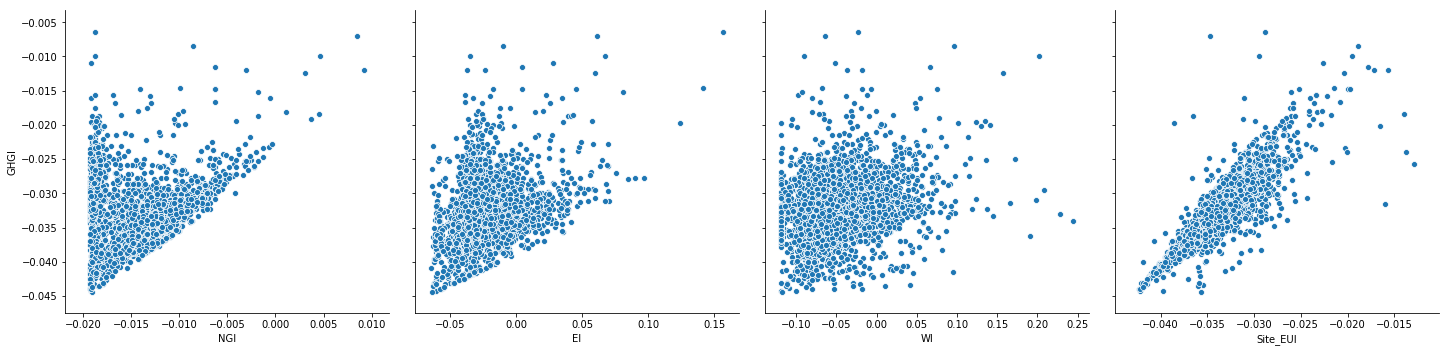

In [221]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df_train, 
             x_vars=['NGI','EI','WI','Site_EUI'], 
             y_vars='GHGI', 
             kind = 'scatter',
             height=5)

These scatter plots show us the correlation between `GHGI` and the different features.  The far pannel on the right shows us that as we increase `Site_EUI` on average we see `GHGI`.  This makes sense as the more energy a building uses the more green house gas it produces.  The same is true of natural gas (`NGI`) for heating or cooking, if this goes up so should our green house gas emissions.  Less intuitive may be electricity usage. We might not expect that as our electicity usage increases our green house gases increases, however, this could be due to the fact the source of the electricity comes from gas or coal.  This could also be why the shape is less linear than `Site_EUI`.  The amount of water we use shoulnd't effect the green house gas emissions (maybe for hot water) and this is displayed in the scater plot for `WI` as it does not show any distinct pattern.

Let's now return to the linear regression. Our goal is to approximate the target variable $y_i$ with a function $h_{\boldsymbol \omega}(\textbf{x}_{i})$. This function is a linear combination of our features,

\begin{equation}
h_{\boldsymbol \omega}(\textbf{x}_{i}) \, = \, \boldsymbol \omega^{T} \textbf{x}_{i} 
\end{equation}


We find the solution vector or coefficients $\boldsymbol \omega$ by minimizing the cost function $J \left( \boldsymbol \omega \right)$,


\begin{align}
\hat{\boldsymbol \omega}
 \; &= \; 
 \min_{\boldsymbol \omega} \, \frac{1}{2} \sum_{i=1}^{n} \left( y_{i}  -h_{\boldsymbol \omega}( \textbf{x}_{i}) \right)^{2} \\
&= \; 
 \min_{\boldsymbol \omega} \, \frac{1}{2} \Vert \textbf{y} - h_{\boldsymbol \omega}(\textbf{x}) \Vert^{2} \\
 &= \; 
 \min_{\boldsymbol \omega} \, J \left( \boldsymbol \omega \right)
\end{align}



Mininmizing $J \left( \boldsymbol \omega \right)$ is equivalent to setting the $\nabla J \left( \boldsymbol \omega \right) \; = \; 0$.  We can expand the cost function,

\begin{align}
J(\boldsymbol \omega ) 
\; &= \; 
\frac{1}{2} \, \Vert  \textbf{y} - \textbf{X} \boldsymbol \omega \Vert^{2} \\
&= \; 
 \min_{\boldsymbol \theta} \, \frac{1}{2} \Vert \textbf{y} - \textbf{X} \boldsymbol \omega \Vert^{2} \\
&= \; \frac{1}{2} \, \left( \textbf{y} - \textbf{X} \boldsymbol \omega \right)^{T}  \left( \textbf{y} - \textbf{X} \boldsymbol \omega  \right) \\
&= \; \frac{1}{2} \, \left( \textbf{y}^{T} \textbf{y}  - \textbf{y}^{T} \textbf{X} \boldsymbol \omega  - \boldsymbol \omega^{T} \textbf{X}^{T} \textbf{y} + \boldsymbol \omega^{T} \textbf{X}^{T} \textbf{X}  \boldsymbol \omega \right)
\end{align}


Taking the gradient of both sides we then have (for a review on matrix calculus see [here](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf)),

\begin{equation}
\boldsymbol \nabla J(\boldsymbol \omega ) 
\; = \;
\textbf{X}^{T} \left( \textbf{y} - \textbf{X} \boldsymbol \omega \right)
\end{equation}


Setting the above equal to zero yields the linear system of equations,


\begin{equation} 
\left(\textbf{X}^{T}\textbf{X}\right) \,
\hat{\boldsymbol \omega}
\; = \;
\textbf{X}^{T} \textbf{y} 
\end{equation}

The above formulation is the so-called **"Normal Equations"**.  We can rewrite them as, 

\begin{equation} 
S \,
\hat{\boldsymbol \omega}
\; = \;
\textbf{b}
\end{equation}

Where $\textbf{b} \, \in \mathbb{R}^{p}$ and $S \, = \, \textbf{X}^{T}\textbf{X} \, \in \mathbb{R}^{p \times p}$. When the features have been scaled (as we have assumed), the  matrix $S$ is the **covariance matrix** 

\begin{equation}
\left(\textbf{X}^{T}\textbf{X}\right)_{i,j} \; = \; \text{Cov}(x_{i},x_{j} )
\end{equation}

The vector $b \, = \, \textbf{X}^{T} \textbf{y} $ is the *projection of the target values onto the finite dimensional space that is spanned by the features.*  Defining the **residual r** as,

\begin{equation}
\textbf{r} \; = \; \textbf{y} - \textbf{X} \boldsymbol \omega 
\end{equation}

Then we note $\nabla J \left( \hat{\boldsymbol \omega} \right) \; = \; 0$ is the same thing as saying,

\begin{equation}
X^{T} \, \textbf{r} \; = \; 0
\end{equation}

Or the solution $\hat{\boldsymbol \omega}$ is *value such that the residual is orthogonal to our feature space or the residual is statistically uncorrelated with any of the features.*

The covariance matrix is symmetric and positive definite, but if the two features are highly correlated then two rows in the matrix will be nearly identical and the matrix will be nearly singular. Statistically, having correlated features bad since it makes it hard to determine the impact on any one feature has on the target. Numerically, having correlated features is bad because the condition number of the covariance matrix explodes.  The reason is that the condition number is definted as,

\begin{equation}
\kappa(S) \; = \; \Vert S \Vert_2 \, \Vert S^{-1} \Vert_2 \; = \; \frac{\sigma_{\text{min}}}{\sigma_{\text{max}}}
\end{equation}

Where $\sigma$ are the singular values from the singular value decomposition.  As the matrix $S$ becomes more singular $\Vert S^{-1} \Vert_2 \, \rightarrow \, \infty$, forcing the $\kappa \, \rightarrow \, \infty$.   We remark that the condition number affects not only the accuracy of your solution, but also the stability of the solvers, see [Lecture 12](https://people.maths.ox.ac.uk/trefethen/text.html).

There are two we will go over about solving the over-determined system of equations $X \boldsymbol \omega \, = \, \textbf{y}$:

1. Solving the Normal Equations using the Cholesky Decomposition

2. Solving the linear system using the Singular Value Decomposition

However, one can also solve the Normal Equations using an [LU factorization](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.lu_solve.html) or the original system with the [QR factorization](https://en.wikipedia.org/wiki/QR_decomposition).

## Linear Solvers For Least Squares Regression 
------------------------
See [Lecture 11](https://people.maths.ox.ac.uk/trefethen/text.html) for more detailed discussions.

### Linear Solver 1: Cholesky Decomposition Of Normal Equations

Let's first solve the Normal Equations:

\begin{equation} 
S \,
\boldsymbol \omega
\; = \;
X^{T} \textbf{y} 
\end{equation}
    
Our covariance matrix $S$ is symmetrix positive definite we can use the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition):

\begin{equation}
S = L L^{T}
\end{equation}

**where $L$ is an lower triangular matrix.** To solve the system from the nomrmal equations then becomes,

\begin{align}
S \, \boldsymbol \omega \; &= \; X^{T} \textbf{y} \\
L L^{T} \, \boldsymbol \omega \; &= \; X^{T} \textbf{y}
\end{align}

Which we can rewrite as first solving,

\begin{equation}
L \textbf{z} \; = \; X^{T} \textbf{y}
\end{equation}

Then solve,

\begin{equation}
L^T \boldsymbol \omega \; = \; \textbf{z}
\end{equation}

As $L$ is an lower triangular matrix each of these linear system of equations is simple to solve and the forward/backward substitutions made to solve them are backwards stable.

Let's try this out by first analyzing the covariance matrix

In [222]:
# Build the covariance matrix
X_t = X.transpose()
S   = X_t.dot(X)

print("S = \n", S)

S = 
 [[ 0.74547278  1.35358196  2.7794211   1.72619886]
 [ 1.35358196  4.09897316  5.16118203  3.39404027]
 [ 2.7794211   5.16118203 16.53112563  6.69851448]
 [ 1.72619886  3.39404027  6.69851448  4.2625346 ]]


Let's take a look at the eigen values to understand the condititioning of our matrix

In [223]:
eigs = np.linalg.eigvals(S)
print(eigs)

[22.1809954   2.73222512  0.03890524  0.6859804 ]


In [224]:
cond_num = np.sqrt(eigs.min() / eigs.max())
print(f"Condition number = {cond_num}")

Condition number = 0.0418806638295396


The eigenvalues are all positive and the condition number is small which is good!

We will now be using many SciPy function calls. SciPy is a sister Python library with Numpy and supports many scientific algorithms.  [SciPy's](https://docs.scipy.org/doc/scipy-0.16.1/reference/linalg.html) linear algebra routines expand on [NumPy's](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) and even allow for use sparse matrices and vectors. SciPy acts a wrappers around LAPACK, indeed the eigenvalue calculator directly calls [LAPACK's](http://www.icl.utk.edu/~mgates3/docs/lapack.html#geev) eigenvalue decomposition.


Let's now perform the Cholesky Decomposition using [SciPy](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.linalg.cholesky.html): 

In [225]:
import scipy as sp

# Perform the Cholesky Factorization
L = sp.linalg.cholesky(S, lower=True)

In [226]:
L

array([[0.86340766, 0.        , 0.        , 0.        ],
       [1.56772058, 1.28110317, 0.        , 0.        ],
       [3.21912954, 0.08936547, 2.48200412, 0.        ],
       [1.99928602, 0.2027303 , 0.0984836 , 0.46324014]])

We can check to make sure that $L L^T \, = \, S$:

In [227]:
L.dot(L.T)

array([[ 0.74547278,  1.35358196,  2.7794211 ,  1.72619886],
       [ 1.35358196,  4.09897316,  5.16118203,  3.39404027],
       [ 2.7794211 ,  5.16118203, 16.53112563,  6.69851448],
       [ 1.72619886,  3.39404027,  6.69851448,  4.2625346 ]])

Then use the matrix $L$ to solve the normal equations using SciPy's [solve_triangular](https://github.com/scipy/scipy/blob/v1.3.3/scipy/linalg/basic.py#L261) (which solves a lower/upper linear system).  This function directly calls [LAPACK's](http://www.icl.utk.edu/~mgates3/docs/lapack.html#trtrs) implementation of forward/backward substitution:

In [229]:
# solve for the coefficents
z     = sp.linalg.solve_triangular(L,   X_t.dot(y), lower=True)
omega = sp.linalg.solve_triangular(L.T, z, lower=False)

print(f"omega : {omega}")

omega : [-0.2376972   0.03247505  0.01313829  1.02531297]


We can now get the predicted values from $\hat{y} \, = \, X \hat{\boldsymbol \omega}$ and plot the results against the true values:

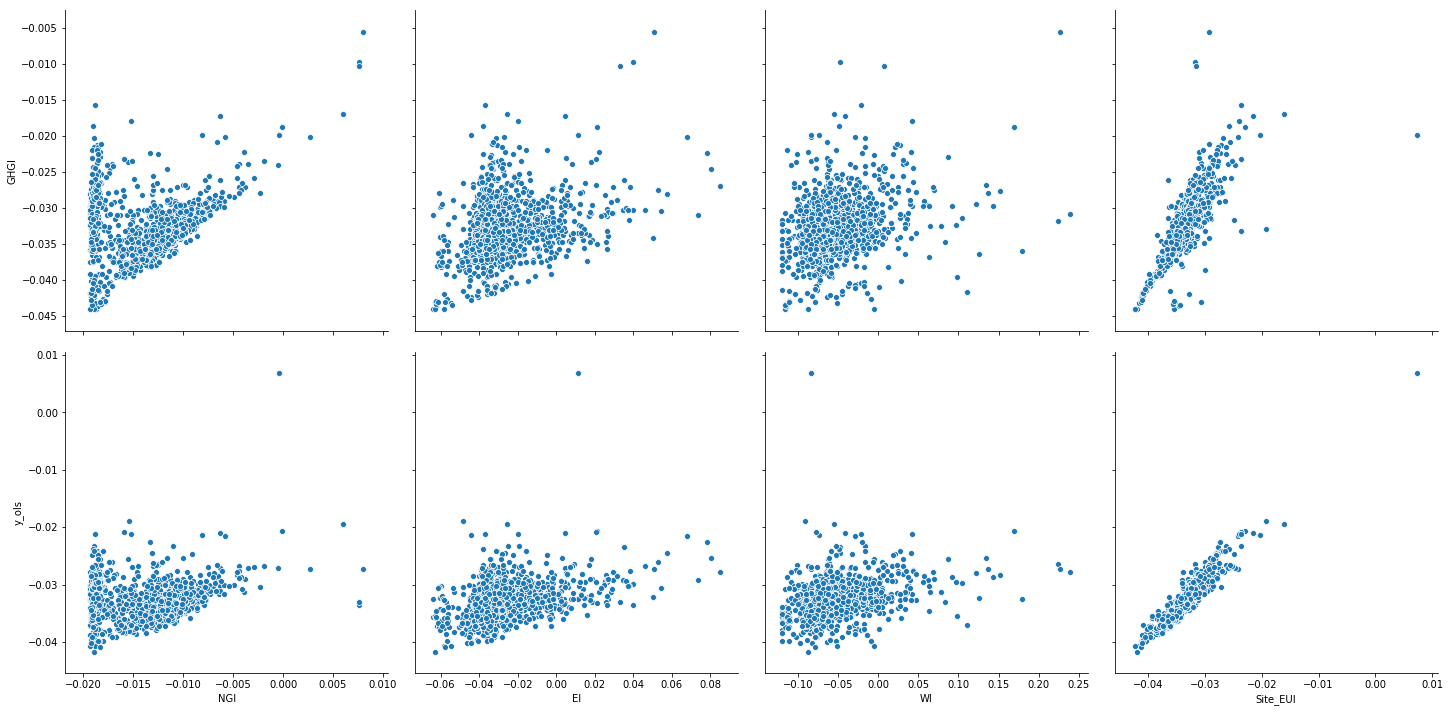

In [230]:
# Get the in sample predicted values
df_test["y_ols"] = X_test.dot(omega)

sns.pairplot(df_test,
             x_vars=['NGI','EI','WI','Site_EUI'], 
             y_vars=['GHGI','y_ols'],
             kind = 'scatter',
             height=5)

We got some of the general shapes, but much of the slopes are too shallow. Let's move onto solving the system of equations with the singular value decomposition. I should note SciPy implements a [Cholesky solver](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.cho_solve.html#scipy.linalg.cho_solve) that directly calls [LAPACK's](http://www.icl.utk.edu/~mgates3/docs/lapack.html#posv) routine.


## Linear Solver 2: The Singular Value Decomposition (SVD)

Let's solve the overdetermined system of equations,

\begin{equation}
X \, \boldsymbol \omega \; = \; y
\end{equation}

using the [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition):

\begin{equation}
X \; = \; U \Sigma V^{T}
\end{equation}

Where $U \, \in \mathbb{R}^{n \times n}$ and $V \, \in  \mathbb{R}^{p \times p}$ are [unitary matrices](https://en.wikipedia.org/wiki/Unitary_matrix) and $\Sigma \, \in \mathbb{R}^{n \times p}$ is a diagonal matrix with the singular values along the diagonal. We can substitute in the SVD into our system of equations to obtain,


\begin{align}
X \, \boldsymbol \omega \; &= \; y \\
U \Sigma V^{T} \boldsymbol \omega \; &= \; y \\
U^{T} U \Sigma V^{T} \boldsymbol \omega \; &= \; U^{T} \, y \\
\Sigma V^{T} \boldsymbol \omega \; &= \; U^{T} \, y
\end{align}

We then transform this to a system of equations:

\begin{equation}
\Sigma \, \textbf{z} \; = \; U^{T} \, y
\end{equation}

and 

\begin{equation}
V^{T} \boldsymbol \omega \; = \; \textbf{z}
\end{equation}

The last system of equation can be transformed using the fact $V$ is unitary ($VV^{T} \, = \, I$):

\begin{equation}
\boldsymbol \omega \; = \; V \textbf{z}
\end{equation}

We can then solve the original system of equations $X \, \boldsymbol \omega \; = \; y$ by 

1. Finding the SVD of the Design Matrix $X \; = \; U \Sigma V^{T}$ then solve,

2. Inverting the diagonal matrix to solve $ \textbf{z} \; = \Sigma^{-1} \; U^{T} \, y$

3. Perform the matrix-vector multiplication: $\boldsymbol \omega \; = \; V \textbf{z}$


We can perform the SVD using [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd)  (which to no surprise calls [LAPACK's](http://www.icl.utk.edu/~mgates3/docs/lapack.html#gesvd) routine):

In [231]:
U, Sig, Vt = sp.linalg.svd(X, full_matrices=False)

We can then look at the shapes of each of the resulting matrices:

In [232]:
U.shape, Sig.shape, Vt.shape

((3702, 4), (4,), (4, 4))

And then perform the steps described above to find $\boldsymbol \omega$,

In [233]:
z = (1 / Sig) * U.transpose().dot(y)

omega = Vt.transpose().dot(z)

print(f"omega : {omega}")

omega : [-0.2376972   0.03247505  0.01313829  1.02531297]


The solution via Cholesky Factorization and the SVD have the same solutions!

One very nice thing about linear regression is that it is very easy to interpret. In linear regression, the coefficients tell us how much an increase in one unit of the feature increase the target variable by one unit.  Therefore the increases in the sites energy usage intensity (`Site_EUI`) increase the GHG emissions the most and intuitively this makes sense.  However, the model is also telling us that the increases in natural gas usage (`NGI`) *decrease* the GHG emissions which doesn't make sense. This most likely happened because the features are correlated (see off diagonal values in covariance matrix $S$ or because the model was over-fitting, i.e. giving to much weight to a specific feature.

### Controling For Overfitting With Regularization
----------------------------
Often times a linear regression will give us good results on the training set, but on very bas results on another independent (test) dataset.  This is an example of overfitting our model.  We can control for overfitting our model by using regularization of the form,

\begin{align}
J(\boldsymbol \omega )
 \; = \; 
 \frac{1}{2n} \sum_{i=1}^{n} \left( y_{i} -  h_{\boldsymbol \omega}(\textbf{x}_{i}) \right)^{2}   + \frac{\lambda}{q} \sum_{i=1}^{p} \vert \omega_{i} \vert^{q}
\end{align}

where $\lambda \, \geq \, 0$.  For $q=2$ this is called [Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) and for $q=1$ it is called [Lasso Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)). Ridge Regression serves to control for over-fitting by shrinking the parameters $\omega_{i}$ as $\lambda$ increases.  Not all individual parameters must shrink as $\lambda$ increases, but in aggregate $\Vert \boldsymbol \omega \Vert^{2}_{\ell_2}$ decreases. We note that *both methods seek to reduce the variance in model, and subsequently increase the bias.*

**Remark: In neither method do we consider penalizing the value $\omega_0$.**

In the case of Ridge Regression we can view the cost function as,

\begin{equation}
\hat{\boldsymbol \omega}
 \; = \; 
 \min_{\boldsymbol \omega}  \Vert \textbf{y} - \textbf{X} \boldsymbol \omega \Vert^{2}_{2}  +  \lambda  \Vert \boldsymbol \omega \Vert^{2}_{2}
\end{equation} 

Which after expanding the values and setting the derivative to zero yields,

\begin{equation}
\hat{\boldsymbol \omega}
\; = \;
\left(\textbf{X}^{T} \textbf{X}  + \lambda I \right)^{-1}
 \left(\textbf{X}^{T} \textbf{y} \right)
\end{equation}

We can see that the regularization term acts to remove the singularity from the covariance matrix if there is correlation among features.  Using the SVD we arrive at:

\begin{align}
\left(\textbf{X}^{T}\textbf{X}  + \lambda I \right) \, \boldsymbol \omega
\; &= \;
 \left(\textbf{X}^{T} \textbf{y} \right) \\
\left( V \Sigma^{T} \Sigma V^{T} + \lambda I \right) \, \boldsymbol \omega 
\; &= \;
 \left(V \Sigma^{T} U^{T} \right) \, \textbf{y} \\
 V \left( \Sigma^{T} \Sigma   + \lambda I \right) V^{T} \, \boldsymbol \omega 
\; &= \;
\left(V \Sigma^{T} U^{T} \right) \, \textbf{y} \\
\left( \Sigma^{T} \Sigma  + \lambda I \right) V^{T} \, \boldsymbol \omega 
\; &= \; \Sigma^{T} U \, \textbf{y}
\end{align}
We can transform the last equation to the system of equations:


\begin{equation}
\left( \Sigma^{T} \Sigma + \lambda I \right) \textbf{z}
\; = \; \Sigma^{T} U^{T} \, \textbf{y}
\end{equation}

with the system corresponding equation $V^{T} \, \hat{\boldsymbol \omega} \; = \; \textbf{z}$ which can be rewritten using the unitary property of $V$ as the matrix-vector multiplication:

\begin{equation}
\hat{\boldsymbol \omega}\; = \; V \textbf{z}
\end{equation}

The matrix, $\left( \Sigma^{T} \Sigma + \lambda I \right) \, \in \mathbb{R}^{p \times p}$ is diagonal and can be inverted by hand.  This gives us a way of solving the problem for Ridge Regression for a given $\lambda$:

1. Finding the SVD $X \; = \; U \Sigma V^{T}$ then solve

2. "Invert" the matrix to obtain $ \textbf{z} \; = \; \left( \Sigma^{T} \Sigma  + \lambda I \right)^{-1} \, \Sigma^{T} \, U^{T} \, \textbf{y}$
    
3. Perform the matrix-vector multiplication $\hat{\boldsymbol \omega} \; = \; V \textbf{z}$
    
We remark we can combine the 2. and 3. to obtain the formula:

\begin{equation}
\hat{\boldsymbol \omega} \; = V \, \left( \Sigma^{T} \Sigma  + \lambda I \right)^{-1} \, \Sigma^{T} \, U^{T} \, \textbf{y}
\end{equation}

And then our predictions $\hat{y} \; = \; X \, \hat{\omega}$ become:

\begin{align}
\hat{y} \; &= \; X \, \hat{\omega} \\
&= \; U \, \Sigma \, \left( \Sigma^{T} \Sigma  + \lambda I \right)^{-1} \, \Sigma^{T} \, U^{T} \, \textbf{y} \\
&= \; U \, D \, U^{T} \, \textbf{y}
\end{align}

As you may have learned the matrix $U$ is unitary so it acts a change of basis transformation and the matrix $D \, = \, \Sigma \, \left( \Sigma^{T} \Sigma + \lambda I \right)^{-1} \, \Sigma^{T} \, \in  \mathbb{R}^{n \times n}$ is a diagonal matrix that either shrinks or elongates along this new basis as shown below:


| ![](https://upload.wikimedia.org/wikipedia/commons/b/bb/Singular-Value-Decomposition.svg) | 
|:--:| 
| *From https://upload.wikimedia.org/wikipedia/commons/b/bb/Singular-Value-Decomposition.svg* |


The values along the diagonal of $D$ take the form,

\begin{equation}
D_{i,i} \; = \; \frac{\sigma_{i}^{2}}{\sigma_{i}^{2} + \lambda}
\end{equation}

From this formulation $D$ acts to shrink the influence of low frequency singular vectors ($\sigma$ small) more than it does high frequency singular vector ($\sigma$ large)!

Let's see how our code will look for solving the Ridge Regression problem using the SVD.


In [234]:
# using function annotations in Python 3 
# (see, https://www.python.org/dev/peps/pep-3107/)

def ridge_svd(
    X         : np.ndarray, 
    y         : np.ndarray, 
    reg_param : float = 1.0
) -> np.ndarray:
    """
    Solves the Ridge Regression problem using the SVD.
    
    Params:
    -------
    X : The matrix of features
    Y : The target vector
    reg_param : The regularization parameter
    
    Returns:
    --------
    omega : The array of coefficent for the solution
    """
    
    # compute the SVD
    U, Sig, Vt   = sp.linalg.svd(X, full_matrices=False)
    
    # for Sigma^{T} Sigma + \lambda (this is an array)
    Sig_plus_reg = Sig * Sig + reg_param

    # find z by "inverting" the matrix and then get omega
    z     = (1.0 / Sig_plus_reg) * Sig * U.T.dot(y)
    omega = Vt.T.dot(z)

    return omega

Let's test this with $\lambda \, = \, 0$ which should give us the least squares regression solution:

In [235]:
print("omega: ", ridge_svd(X, y, 0.0))

omega:  [-0.2376972   0.03247505  0.01313829  1.02531297]


It does! Let's try adding a little regularization and see what happens.

In [250]:
omega = ridge_svd(X, y, 0.1)
print(f"omega: {omega}")

omega: [0.14161464 0.07955296 0.03040791 0.78857811]


We can see that adding regulaization shrank the last feature, i.e. (`Site_EUI`) and made turned the coefficient for `NGI` positive which makes sense!  Let's take a look at the results:

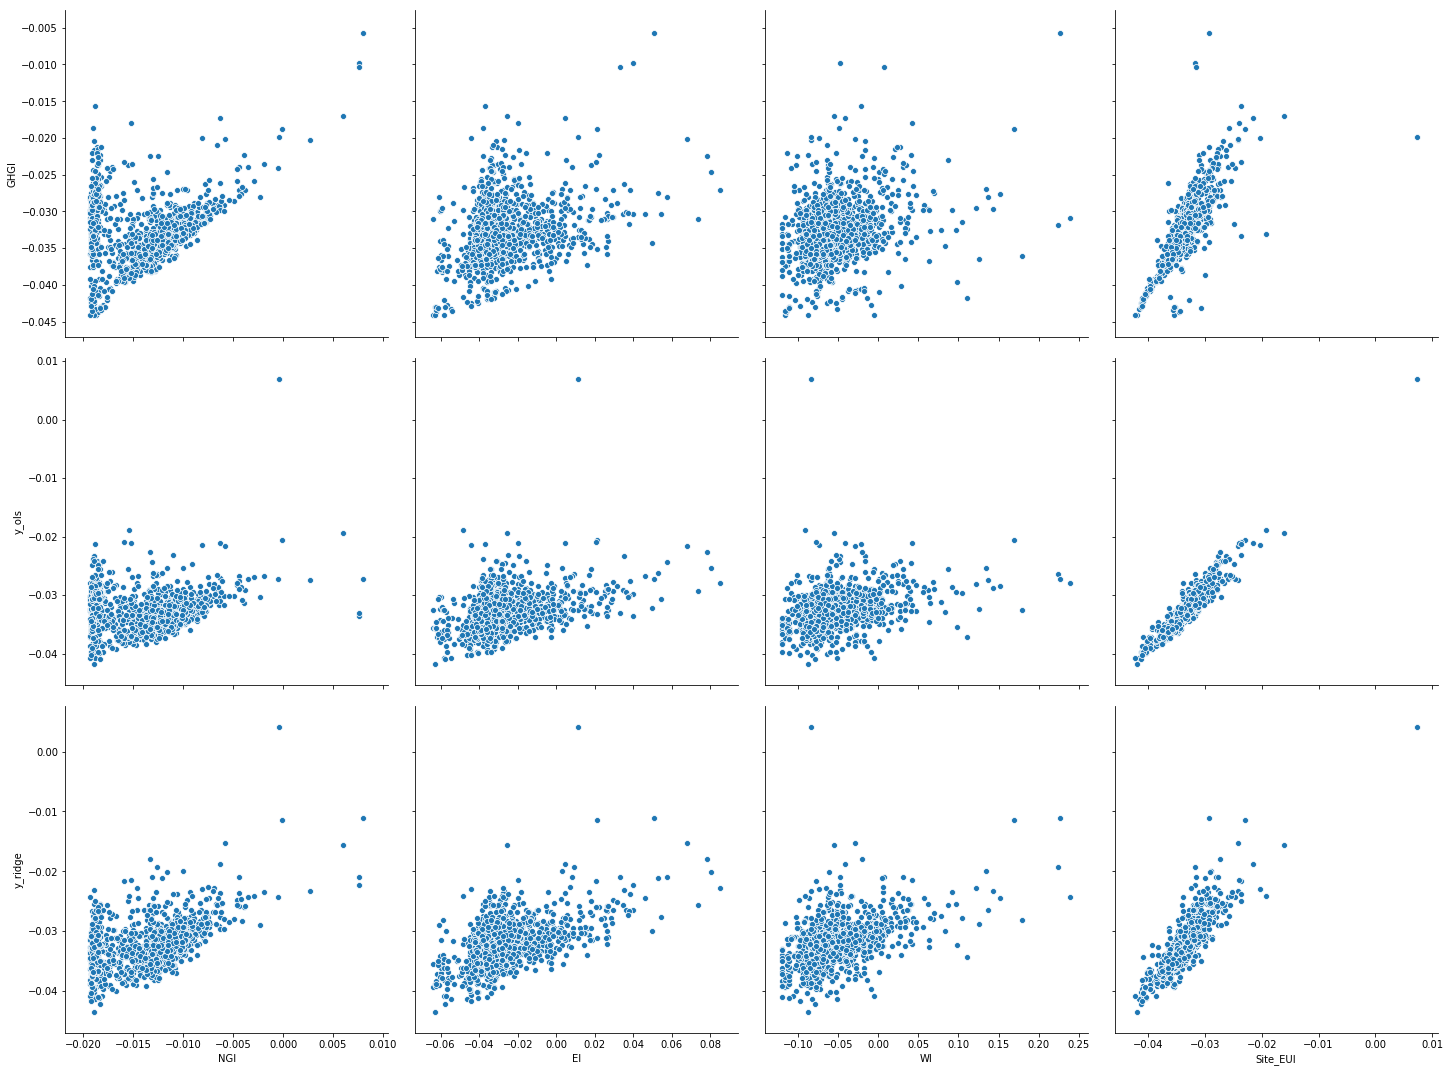

In [251]:
df_test["y_ridge"] = X_test.dot(omega)

sns.pairplot(df_test,
             x_vars=['NGI','EI','WI','Site_EUI'], 
             y_vars=['GHGI','y_ols','y_ridge'],
             kind = 'scatter',
             height=5)

I may be biased (like our model now is) but I think the results for ridge regression look better!  The slopes of `y_ridge` is much closer to the actual values of of $y$.

Notice that I have left out how to find the regularization parameter $\lambda$.  That topic is out of scope for this post. However, for reference, the best value for $\lambda$ is often chosen via cross-validation, see [these slides](http://statweb.stanford.edu/~owen/courses/305a/Rudyregularization.pdf) for more information.

### Implementation In Scikit-Learn

[Scikit-Learn](https://scikit-learn.org/) is the industry standard open source machine leanring library in Python. As it is open source we can easily see how the developers wrote their linear sovlers by going to the library's [GitHub](https://github.com/scikit-learn/scikit-learn).  

For regression, Scikit-learn mostly acts as a wrapper around Scipy which act as a wrapper to BLAS/LAPACK. The regular linear regression [Scikit-Learn](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/linear_model/base.py#L367) implementation utilizes Scipy's [least square solver](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), which if the matrix is dense calls [BLAS/LAPACK](https://github.com/numpy/numpy/blob/master/numpy/linalg/umath_linalg.c.src#L3167).  If the matrix $X$ is sparse then it calls SciPy's [sparse least squares solver](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) which uses least squres with QR factorization [LSQR](https://github.com/scipy/scipy/blob/v1.3.2/scipy/sparse/linalg/isolve/lsqr.py#L98-L570).  Note that while $X \, \in \mathbb{R}^{n \times p}$ may be a large sparse matrix, the covariance matrix $S \, \in \mathbb{R}^{p \times p}$ is typically quite small and dense.

For ridge regression, unless the user specifices the linear sovler to use then if the intercept is needed Scikit-learn solve the linear system with the [Stochastic Average Gradient](https://arxiv.org/abs/1309.2388) method, otherwise it uses the [Cholesky Decomposition](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/linear_model/ridge.py#L134) for dense matrices and [Conjugate Gradient](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/linear_model/ridge.py#L37) method for sparse matrices. Although, all the algorithms are written for dense or sparse matrices. The congugate gradient method makes use of SciPy's [Sparse CG function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) which does not need to explicitly form the matrix, but rather only needs its action on a vector making it extremely efficient for sparse matrices.  If any of these methods fail, the least square QR solver is used.

## A Touch Of Recommendation Systems
------------------------------------

Recommendation systems have become very popular and are one of the best examples of Machine Learning that we interact with daily, i.e. Amazon and Netflix. One popular technique for making recommendations is called Alternating Least Squares.  

The idea is that we have some table of ratings of items by users as shown below:


| ![space-1.jpg](images/matrixfactorize.png) | 
|:--:| 
| *From https://recsysjd.wordpress.com/2016/09/10/matrix-factorization-techniques-for-recommender-systems* |

However, not all users will have rated all items and we want to predict how a user may feel about an item they have note rated.  This is how recomendations happen, through the prediction of how a user might rate an item they have not seen before!  

Let's for example take the idea of recommending movies to users of a streaming webservice.  The idea is we want to say a given user has some preference on a movie by the perfence of the generes that make up the movie.  For simplicity let's say movies are a combination of the genres (so-called [latent factors](https://en.wikipedia.org/wiki/Latent_variable) in machine learning):

- Horror
- Action 
- Comedy

Then we can write a user's preference as well a movie as a linear combinatin of these genres:

\begin{align}
\text{Sally} \; &= \; 1 \times \text{Horror} +  2 \times \text{Action} - 0.2 \times \text{Comedy} \\
\ \text{Weekend At Bernies} \; &= \; 0 \times \text{Horror} +  1 \times  \text{Action} + 5 \times \text{Comedy}  \\
\text{Sally's Rating of Weekend At Bernies}  \; &= \; 1 \times 0 + 2 \times 1 - 0.2 \times 5 \\
&= \; 1 \, \text{Star}
\end{align}

If we label $R_{u,i}$ as user $u$'s rating of movie $i$, then the inner product of the vector of movie coefficients $m_{i}$ and user preferences $p_{u}$ is $R_{u,i}$ :


\begin{equation}
R_{u,i} \; = \; \textbf{m}_{i}^{T} \textbf{p}_{u}
\end{equation}

We can then factorize the review matrix $R$ into a product of movies $M$ and users $P$ as depicted in the diagram above,

\begin{equation}
R \; \simeq \; M^{T} P
\end{equation}

If $R \in \mathbb{R}^{n \times k}$ and we have $f$ latent factors that make a movie then the movie genres are $G \in \mathbb{R}^{f \times n}$ and user preferences are $P \in \mathbb{R}^{f \times k}$.  How do we find the coefficient for each user and each movies, i.e. how do we find the matrices $M$ and $P$?

The idea is we can set up a cost function almost like Ridge Regression and minimize with respect to $M$ and $P$:

\begin{equation}
\min_{M,P} \, J(M,P) \; = \; \frac{1}{2} \Vert R - M^{T} P \Vert^{2}_{F}  + 
\frac{\lambda}{2} \left( \Vert M \Vert^{2}_{F} + \Vert P \Vert^{2}_{F} \right) \
\end{equation}

Where $\Vert \cdot \Vert_{F}$ is the [Frobenius Norm](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm).  How do we minimize for both $M$ and $P$? Well one way is to:

0. Randomly initialized $M$ and $P$ then

1. Fix $M$ and solve for $P$ such that $\nabla_{P} J(M,P) \; = \; 0$

2. Fix $P$ and solve for $M$ such that $\nabla_{M} J(M,P) \; = \; 0$

3. Repeat steps 1 and 2 until convergence or max iterations reached

At each stage in 1. and 2. you are updating the choice and $M$ and $P$ by essentially solving a Least Squares Ridge Regression problem for $P$ and $M$. The alternating nature of this iterative algorithm gives rise to its name [Alternating Least Squares](https://link.springer.com/chapter/10.1007%2F978-3-540-68880-8_32)! Some links to good references for Alternating Least Squares below.


## Where To Go From Here
--------------

We've gone over a few topics in this blogpost and I want to supply the reader with some links for more information on the topics discussed.

### Numerical Linear Algebra

- http://people.maths.ox.ac.uk/~trefethen/text.html

- https://jhupbooks.press.jhu.edu/title/matrix-computations

- https://www.springer.com/gp/book/9783540346586



### Regression & Machine Learning

- http://faculty.marshall.usc.edu/gareth-james/ISL/

- https://www.crcpress.com/An-Introduction-to-Generalized-Linear-Models/Dobson-Barnett/p/book/9781138741515

- https://web.stanford.edu/~hastie/Papers/ESLII.pdf

- http://stanford.edu/~rezab/classes/cme323/S15/


### Recommendation Systems:
- https://spark.apache.org/docs/latest/ml-collaborative-filtering.html

- http://www.mattmoocar.me/recsys/

- https://web.stanford.edu/~rezab/papers/fastals.pdf

- http://yifanhu.net/PUB/cf.pdf

